<a href="https://colab.research.google.com/github/BearsOnMars/Coursera_Projects/blob/main/2_GoldSilver_PricePrediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold & Silver Price prediction using ARIMA
Autoregressive Integrated Moving Average

In [99]:
# Importing necessary libraries
# pandas - data manipulation and analytics
# Arima - Forecasting (pmd arima statistical library, used to find values to create model )
# matplotlib - data visualisation

In [100]:
!pip install pmdarima

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset & Exploring it

In [102]:
# downloading dataset csv from yahoofinance, storing it as df using pandas
from google.colab import files 
files.upload()


Saving GC=F.csv to GC=F (1).csv


{'GC=F.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-07-01,1324.500000,1344.199951,1321.900024,1336.699951,1336.699951,137\n2016-07-05,1342.199951,1356.800049,1339.699951,1356.400024,1356.400024,90\n2016-07-06,1359.000000,1374.900024,1359.000000,1364.900024,1364.900024,130\n2016-07-07,1366.800049,1368.599976,1350.500000,1360.099976,1360.099976,207\n2016-07-08,1361.300049,1365.800049,1335.000000,1356.599976,1356.599976,249\n2016-07-11,1371.699951,1371.800049,1353.000000,1355.000000,1355.000000,26\n2016-07-12,1353.599976,1356.000000,1330.300049,1334.099976,1334.099976,252\n2016-07-13,1341.500000,1342.400024,1336.699951,1342.400024,1342.400024,7\n2016-07-14,1341.400024,1341.400024,1322.699951,1331.300049,1331.300049,20\n2016-07-15,1333.699951,1333.699951,1322.900024,1326.500000,1326.500000,52\n2016-07-18,1327.500000,1335.000000,1326.199951,1328.400024,1328.400024,54\n2016-07-19,1328.500000,1333.199951,1326.400024,1331.500000,1331.500000,322\n2016-07-20,1331.000000,1337.500000,13

In [103]:
df = pd.read_csv('GC=F.csv')

In [ ]:
df

In [105]:
df.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1256 non-null   object 
 1   Open       1245 non-null   float64
 2   High       1245 non-null   float64
 3   Low        1245 non-null   float64
 4   Close      1245 non-null   float64
 5   Adj Close  1245 non-null   float64
 6   Volume     1245 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.8+ KB


In [123]:
df.describe() # For descriptive statistics

,Close
count,1245.000000
mean,1446.588917
std,241.947439
min,1127.800049
25%,1266.500000
50%,1324.300049
75%,1666.400024
max,2051.500000


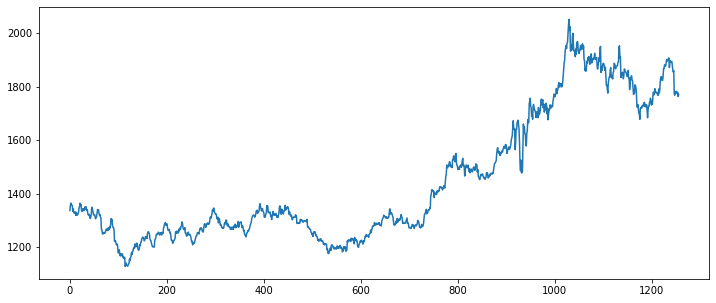

In [124]:
# Visualising closing price using matplotlib
df['Close'].plot(figsize=(12,5))

# About ARIMA
AR - Autoregression i.e. predicting future values based on past values (p)

I - Integrated - Difference (d) for conversion to stationarity

MA - Moving Average i.e. predicting based on past errors (q)

ARIMA (p,d,q) Simplest model is (1,1,1)

p is the number of autoregressive terms

d is the number of non-seasonal differences needed for stationarity

q is the number of lagged forecast errors

using large values of (p,d,q) leads to overfitting and statistical errors

so the goal is to find an optimal value for (p,d,q)

Stationarity - Constant mean, constant standard deviation, no seasonality, no trend. But real world time series are non-stationary. The I(integrated) in ARIMA converts non-stationary to stationary

# with pmdarima we can find the optimal value of (p,d,q)

In [125]:
# finding order (p,d,q) using auto arima
from pmdarima import auto_arima

In [126]:
# need to ensure that there are no null values
df=df.dropna()
best_order = auto_arima(df['Close'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10183.483, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10179.166, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10180.645, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10180.686, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10177.891, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10181.974, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.325 seconds


# Data Preparation - Train Test Split

In [127]:
columns=['Close']
df=pd.DataFrame(df,columns=columns)

In [128]:
df

,Close
0,1336.699951
1,1356.400024
2,1364.900024
3,1360.099976
4,1356.599976
...,...
1251,1775.599976
1252,1776.599976
1253,1779.599976
1254,1762.800049


In [129]:
# Splitting data in 85:15 (Training:Testing)
train, test= df[0:int(len(df)*0.85)], df[int(len(df)*0.85):]

In [130]:
train.shape, test.shape

((1058, 1), (187, 1))

In [131]:
df.shape

(1245, 1)

# Creating ARIMA Model

In [132]:
# importing traditional arima model
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train, order=(0,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1058
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4233.251
Date:                Thu, 01 Jul 2021   AIC                           8468.502
Time:                        12:51:01   BIC                           8473.466
Sample:                             0   HQIC                          8470.384
                               - 1058                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       176.2790      3.206     54.984      0.000     169.995     182.563
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3957.15
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


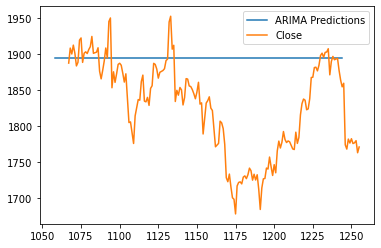

In [133]:
start=len(train)   # Example = y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima it is 2 > data-1
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

# Error

In [134]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

92.84705562810208


In [135]:
df.describe()

,Close
count,1245.000000
mean,1446.588917
std,241.947439
min,1127.800049
25%,1266.500000
50%,1324.300049
75%,1666.400024
max,2051.500000


# More Forecast Graphs

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


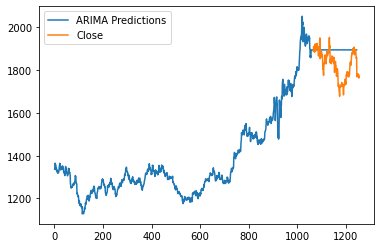

In [136]:
start=1
end=1245
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


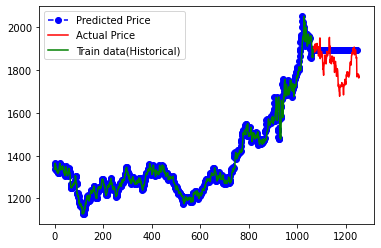

In [137]:
start=1
end=1245
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
test['Close'].plot(legend=True, color='red', label='Actual Price')
train['Close'].plot(legend=True, color='green', label='Train data(Historical)')

# Forecasting 30 days into the Future

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


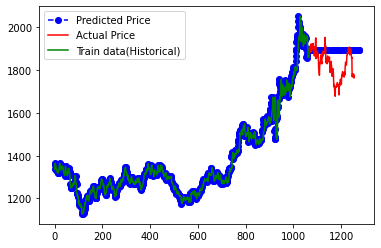

In [138]:
start=1
end=1275
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
test['Close'].plot(legend=True, color='red', label='Actual Price')
train['Close'].plot(legend=True, color='green', label='Train data(Historical)')

# Forecasting for Silver
Essentially repeating the same steps as above

In [139]:
from google.colab import files 
files.upload()

Saving SI=F.csv to SI=F (1).csv


{'SI=F.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-07-01,18.790001,19.924999,18.775000,19.544001,19.544001,1083\n2016-07-05,19.754999,21.094999,19.625000,19.865999,19.865999,948\n2016-07-06,20.330000,20.495001,19.945000,20.160000,20.160000,407\n2016-07-07,20.139999,20.219999,19.530001,19.798000,19.798000,536\n2016-07-08,19.735001,20.209999,19.400000,20.058001,20.058001,384\n2016-07-11,20.370001,20.605000,20.215000,20.264000,20.264000,138\n2016-07-12,20.410000,20.465000,20.100000,20.129999,20.129999,141\n2016-07-13,20.385000,20.420000,20.195000,20.370001,20.370001,86\n2016-07-14,20.440001,20.440001,20.084999,20.281000,20.281000,115\n2016-07-15,20.230000,20.230000,20.080000,20.125000,20.125000,93\n2016-07-18,20.025000,20.094999,19.745001,20.044001,20.044001,301\n2016-07-19,19.959999,20.010000,19.920000,19.975000,19.975000,46\n2016-07-20,19.625000,19.625000,19.410000,19.582001,19.582001,136\n2016-07-21,19.375000,19.784000,19.325001,19.784000,19.784000,28\n2016-07-22,19.790001,

In [140]:
df = pd.read_csv('SI=F.csv')

In [141]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-01,18.790001,19.924999,18.775000,19.544001,19.544001,1083.0
1,2016-07-05,19.754999,21.094999,19.625000,19.865999,19.865999,948.0
2,2016-07-06,20.330000,20.495001,19.945000,20.160000,20.160000,407.0
3,2016-07-07,20.139999,20.219999,19.530001,19.798000,19.798000,536.0
4,2016-07-08,19.735001,20.209999,19.400000,20.058001,20.058001,384.0
...,...,...,...,...,...,...,...
1251,2021-06-24,26.047001,26.047001,26.047001,26.047001,26.047001,0.0
1252,2021-06-25,26.174999,26.174999,26.082001,26.082001,26.082001,9.0
1253,2021-06-28,26.218000,26.218000,26.218000,26.218000,26.218000,42308.0
1254,2021-06-29,26.200001,26.209999,25.559999,25.872000,25.872000,20140.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1256 non-null   object 
 1   Open       1245 non-null   float64
 2   High       1245 non-null   float64
 3   Low        1245 non-null   float64
 4   Close      1245 non-null   float64
 5   Adj Close  1245 non-null   float64
 6   Volume     1245 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.8+ KB


In [143]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,18.396284,18.501335,18.279036,18.385138,18.385138,2135.227309
std,3.909564,3.969227,3.843762,3.908070,3.908070,11967.992417
min,12.070000,12.205000,11.735000,11.735000,11.735000,0.000000
25%,15.995000,16.010000,15.870000,15.929000,15.929000,8.000000
50%,17.030001,17.105000,16.955999,17.032000,17.032000,43.000000
75%,18.695000,18.815001,18.540001,18.660000,18.660000,155.000000
max,29.530001,30.160000,28.313999,29.398001,29.398001,131415.000000


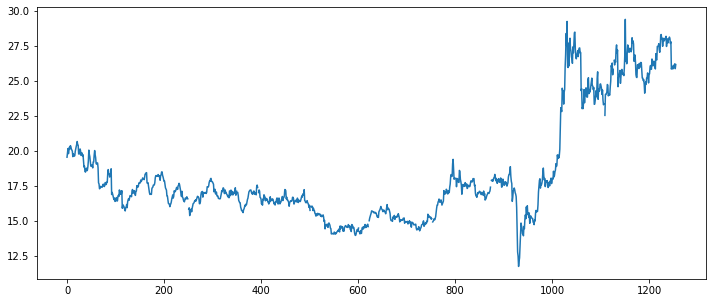

In [144]:
df['Close'].plot(figsize=(12,5))

In [145]:
from pmdarima import auto_arima
df=df.dropna()
best_order = auto_arima(df['Close'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1149.115, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1176.529, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.277, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1158.168, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1174.763, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1153.002, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1154.169, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1146.723, Time=1.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1156.180, Time=0.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1147.742, Time=1.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1150.143, Time=2.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1146.866, Time=2.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1146.684, Time=1.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1144.739, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept

In [146]:
columns=['Close']
df=pd.DataFrame(df,columns=columns)
# Splitting data in 85:15 (Training:Testing)
train, test= df[0:int(len(df)*0.85)], df[int(len(df)*0.85):]
train.shape, test.shape
df.shape
# importing traditional arima model
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train, order=(4,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1058
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -321.481
Date:                Thu, 01 Jul 2021   AIC                            652.961
Time:                        12:54:22   BIC                            677.777
Sample:                             0   HQIC                           662.367
                               - 1058                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0556      0.015     -3.651      0.000      -0.086      -0.026
ar.L2          0.1555      0.013     12.173      0.000       0.130       0.181
ar.L3          0.0333      0.014      2.457      0.014       0.007       0.060
ar.L4         -0.1085      0.017     -6.557      0.000      -0.141      -0.076
sigma2         0.1076      0.002     65.723      0.000       0.104       0.111
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             12153.39
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


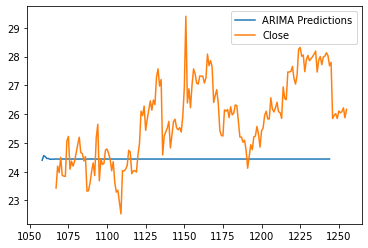

In [147]:
start=len(train)   # Example = y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima it is 2 > data-1
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Silver Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [148]:
# Error
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

1.9655610318432304


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


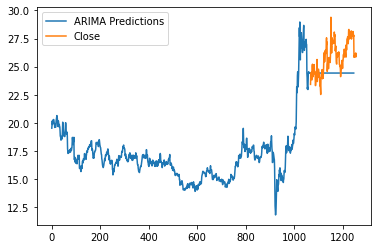

In [149]:
start=1
end=1245
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Silver Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


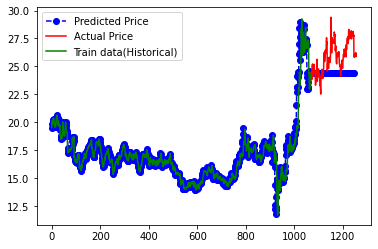

In [150]:
start=1
end=1245
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
test['Close'].plot(legend=True, color='red', label='Silver Price')
train['Close'].plot(legend=True, color='green', label='Train data(Historical)')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


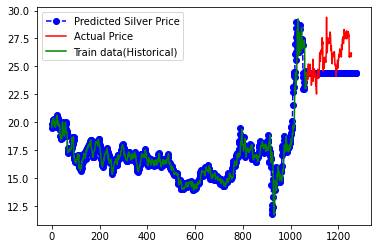

In [151]:
start=1
end=1275
pred=model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color='blue', marker='o', linestyle='dashed', label='Predicted Silver Price')
test['Close'].plot(legend=True, color='red', label='Actual Price')
train['Close'].plot(legend=True, color='green', label='Train data(Historical)')